In [1]:
import tensorflow as tf 
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())

2.17.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x1415b4ee0>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import Ingestion 

INFO:Ingestion:Ingestion Folder initialized
INFO:Ingestion:Functions for the screen recording and folder creation are available


In [3]:
Capture =  Ingestion.ShowVideoKeypoints()

In [ ]:
import warnings
with warnings.catch_warnings():
    Capture.run()

## Directory Structure

In [5]:
FolderStr = Ingestion.FolderStructure(path="/Users/simoneboesso/Desktop/SignLanguageDetection/DATA", no_sequences=30, sequence_length=30, start_folder=0, actions= ["hello", "thanks", "iloveyou"])

In [6]:
FolderStr.create()

# Data acquisition

In [1]:
import Ingestion 
extractor = Ingestion.ExtractKeyPoints(path="/Users/simoneboesso/Desktop/SignLanguageDetection/DATA", no_sequences=30, sequence_length=50, start_folder=0, actions= ["hello", "thanks", "iloveyou"])

INFO:Ingestion:Ingestion Folder initialized
INFO:Ingestion:Functions for the screen recording and folder creation are available


In [ ]:
#use it to save the files
#extractor.extract()

In [2]:
features, labels = extractor.Return_dataset()

In [3]:
features.shape

(90, 50, 1662)

In [4]:
labels.shape

(90, 3)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [6]:
import Models

model = Models.LSTMModel(input_shape=(30,1662), num_classes=3)
model.summary()

INFO:Models.logger:Models Folder initialized
INFO:Models.logger:Models for sign detections
INFO:Models.logger:The model is compiled.
INFO:Models.logger:checking for reproducibility!
INFO:Models.logger:the value is [-769.30914]
INFO:Models.logger:check #0, the result is [-769.30914]
INFO:Models.logger:check #1, the result is [-769.30914]
INFO:Models.logger:check #2, the result is [-769.30914]
INFO:Models.logger:check #3, the result is [-769.30914]
INFO:Models.logger:check #4, the result is [-769.30914]
INFO:Models.logger:check for reproducibility done!
INFO:Models.logger:LSTM model initialization complete.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,771 (1.70 MB)

 Trainable params: 444,771 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test))

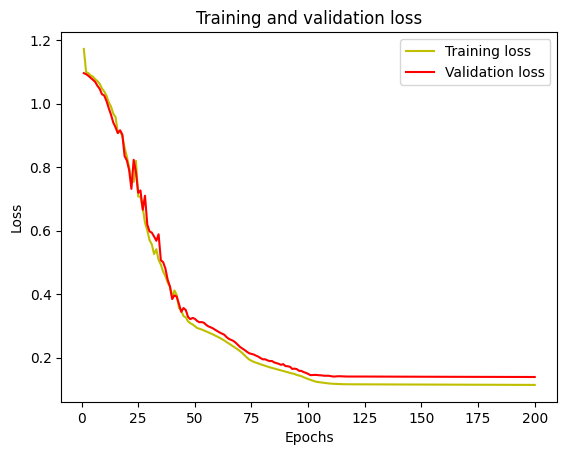

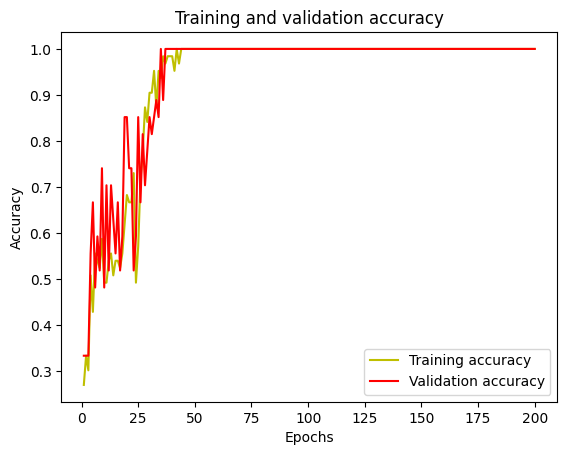

In [8]:
import matplotlib.pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['categorical_accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_categorical_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.model.save("prova.h5")

In [10]:
res = model.predict(X_test)
import numpy as np
actions= ["hello", "thanks", "iloveyou"]
actions[np.argmax(res[1])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


'hello'

In [11]:
actions[np.argmax(y_test[1])]

'hello'

# Loading the saved model

In [2]:
import Models
import numpy as np
model = Models.LSTMModel(input_shape=(30,1662), num_classes=3, load=True)

INFO:Models.logger:Models Folder initialized
INFO:Models.logger:Models for sign detections
INFO:Models.logger:LSTM model initialization complete.


In [13]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [14]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[18,  0],
        [ 0,  9]],

       [[18,  0],
        [ 0,  9]],

       [[18,  0],
        [ 0,  9]]])

In [15]:
accuracy_score(ytrue, yhat)

1.0

# Real  time

In [3]:
import Ingestion
test = Ingestion.TestTime(model=model,actions=["hello", "thanks", "iloveyou"])

In [ ]:
test.run()